# A Basic Model of Electricity and Heat Systems

Consider a stylized model of the electricity and heat systems where a portfolio of generators (indexed $i$) competes to serve a time varying demand for electricity $(D_h^E)$ and heat $(D_h^H)$, where $h$ refers to hours. The consumers' willingness to pay are 100 €/MWh for both electricity and heat throughout all hours. The system relies on four different type of generators:

- <u>Standard (dispatchable) plants</u> use a combination of primary energy carriers (indexed by $j$) and an aggregate of other inputs $(oth)$ to produce either electricity or heat. Let $\mu_j^i$ denote the input share of energy carrier $j$ for generator $i$, measured as MWh input of energy carrier $j$ per MWh output of electricity or heat. Let $E_{i,h}$ and $H_{i,h}$ denote the hourly generation of electricity and heat, and let $q_i$ denote the installed hourly generating capacity for the plant $i$.
- <u>Intermittent plants</u> are similar to standard plants, except that hourly generating capacity is defined as $q_{i,h} = q_i \gamma_{i,h}$ where $\gamma_{i,h}\in[0,1]$ indicates availability of generator $i$ in hour $h$. We use the notation $\mathcal{I}^E$ ($\mathcal{I}^H$) to denote the set of all standard and intermittent electricity (heat) producing plants.    
- <u>Back-pressure plants</u> are similar to standard electricity producing plants, except that they utilize the excess heat from electricity production to co-produce heat. Let $\nu_i$ denote the electricity-to-heat ratio for a back-pressure plant $i$. We use the notation $\mathcal{I}^{BP}$ to denote the set of all back-pressure plants. 
- <u>Heat pumps</u> are slightly different than standard heat producing plants as they rely on electricity as energy input. Thus, heat pumps have negative electricity-to-heat ratios $(\nu_i<0)$. We use the notation $\mathcal{I}^{HP}$ to denote the set of all heat pumps.

## E1 

__Set up the optimization problem for the model described above.__

## E2

__Set up the Lagrangian for the optimization problem in [E1](#E1) and show that the first order condition for $E_{i,h}$ and $H_{i,h}$ can be writen as:__

\begin{align}
\forall i\in\mathcal{I}^E & : & - c_i+\lambda_h^E + \underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0& \tag{1a} \label{eq:1a} \\
\forall i\in\mathcal{I}^{H} & : & - c_i+\lambda_h^H + \underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0& \tag{1b} \label{eq:1b} \\
\forall i\in\mathcal{I}^{BP} & : & - c_i+\lambda_h^E + \frac{\lambda^H}{\nu_i} +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0& \tag{1c} \label{eq:1c} \\
\forall i\in\mathcal{I}^{HP} & : & - c_i+\lambda_h^H + \nu_i\lambda^H +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0& \tag{1d} \label{eq:1d}
\end{align}

where $\lambda^E$ and $\lambda^H$ denote the shadow costs of equilibrium constraints on electricity and heat markets in hour $h$, respectively, and $\underline{\theta}$ and $\overline{\theta}$ denote the shadow costs on the domain constraints on generation variables $E$ and $H$. 

*Note: Use the same notation as in the above*.

## E3

__Briefly explain the intuition the conditions [E2](#E2).__ 

___Answer:___

To interpret the conditions, we rely on an interpretation of $\lambda_h^E$ and $\lambda_h^H$ as equilibrium prices/system marginal costs.
- Generally, the shadow costs $\underline{\theta}, \overline{\theta}$ are used to enforce domain constraints. Take for instance a standard electricity producing plant: If $\lambda_h^E-c_i>0$, the plant is relatively cost-effective. In this case, $\overline{\theta}_{i,h}^E=\lambda_h^E-c_i>0$ indicating that the relevant upper domain constraint is active $(E_{i,h}=q_{i,h})$. 
    
    _NB: This should not be considered the most important part of the answer -- but rather an extra point if the student shows an understanding of this corner solution logic._
- For the back-pressure plant, the marginal revenue stream is measured as 1 unit of electricity (valued at $\lambda_h^E$) and $1/\nu_i$ units of co-generated heat (valued at $\lambda_h^H$).
- For the heat pump, the marginal revenue stream is $\lambda_h^H$, while the costs are $c_i-\nu_i \lambda_h^E$, where $\nu_i<0$ measures the consumption of electricity. 

## E4

__Explain how the heat pump technology can be seen as an example of (i) electrification and (ii) flexible demand.__

___Answer:___

*Ad i)* Electrification is an important strategy in the green transition and refers to the process whereby renewable electricity replaces fossil fuels in the production of goods and services. The heat pump technology is an example of electrification of the heat sector, since renewable electricity is converted into heat to provide heating survices. Note that this should not be confused with use of e.g. solar heating or biomass in the generation of heating services. 


*Ad ii)* The heat pump is also an example of a flexible demand technology in the electricity system in the sense that it increases demand when electricity prices are low (and electricity therefore is abundant). Similarly, heat pumps can shut down and reduce electricity demand when electricity costs are prohibitively high. This relative flexibility of heat pumps comes from the fact that heat is more easily stored. For instance, even if heat prices are low when electricity prices are also low, the generated heat can more easily be stored for when demand for heat is high.

---

In the rest of this exercise, we will be working with the a simplified version of the `mBasicPH` model adapted to the model setting above. The file `HP_InputData.xlsx` includes a model database with parameters for the model. We refer to the scenario with parameters as outlined in this data as the _baseline_ scenario. The table below translates the names used in the data to the symbols used in the model. 

| Name in excel file | Model symbol |
|:--------|:--------:|
|  FuelMix   |  $\mu_ij$   |
|  GeneratingCapacity   | $q_i$   |
|  OtherMC   | $c_i^{oth}$   |
| E2H | $\nu_i$ |
| FuelPrice | $p_j^f$ |
| EmissionIntensity | $\phi_j$ |
| MWP, E | $\mu_E$ |
| MWP, H | $\mu_E$ |
| LoadVariation, E | $L_h^E$ |
| LoadVariation, H | $L_h^H$ |
| CapVariation | $\gamma_{i,h} $ |

For working with the model, we first import some packages and the modelclass

In [1]:
%run ../stdPackages.ipynb
from pyDbs import *
from py.modelclass import *
from IPython.display import Image
figs_path = os.path.join(d['curr'],'Figs')

Next we load the database:

In [2]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables'],
        'maps': ['LoadMaps','GeneratorsMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}
path_to_data = os.path.join(d['curr'],'Data','mBasicPHLarge.xlsx')
db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

We then initialize and solve the model:

In [3]:
m = mSimple(db.copy()) # initialize using the database 'db' from above.
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


Below, we illustrate the load duration curve (LDC) and the residual demand curve (RDC) for both the electricity and the heat market:

In [4]:
# Image(os.path.join(figs_path,'LDC_RDC.png'))

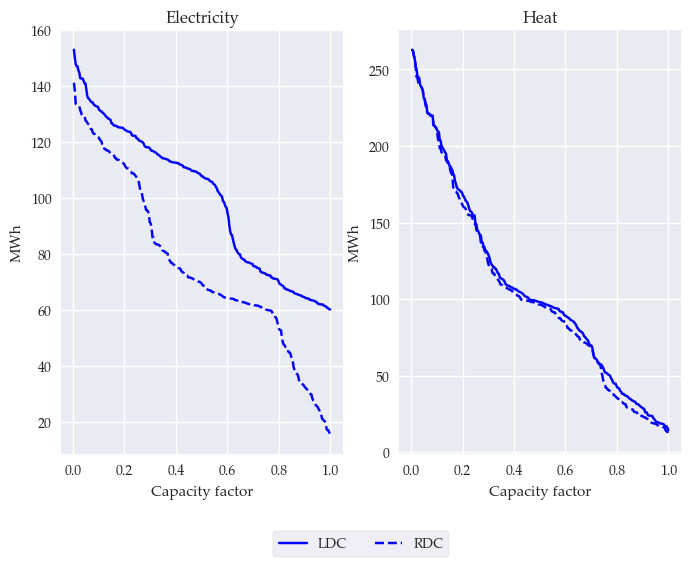

In [5]:
# We first generate the LDCs:
LDC = pd.concat([
    pd.Series(m.hourlyLoad_E.sort_values(ascending=False).values,index=pd.Index([i/len(m.hourlyLoad_E.values) for i in range(1,len(m.hourlyLoad_E.values)+1)]),name='E'),
    pd.Series(m.hourlyLoad_H.sort_values(ascending=False).values,index=pd.Index([i/len(m.hourlyLoad_H.values) for i in range(1,len(m.hourlyLoad_H.values)+1)]),name='H'),
],axis=1).stack().rename_axis(['Capacity factor','Market'])

# Next, we generate the RDCs:
RDC = pd.concat([
    (m.hourlyLoad_E.droplevel('g') - adj.rc_pd(adjMultiIndex.applyMult(m.hourlyGeneratingCap_E,m.db['id2hvt']), ('not', pd.Index(['Standard'], name='hvt'))).groupby('h').sum()).rename('E'),
    (m.hourlyLoad_H.droplevel('g') - adj.rc_pd(adjMultiIndex.applyMult(m.hourlyGeneratingCap_H,m.db['id2hvt']), ('not', pd.Index(['Standard'], name='hvt'))).groupby('h').sum()).rename('H')
],axis=1)
for col in RDC:
    RDC[col] = RDC[col].sort_values(ascending=False).values
RDC.index = pd.Index([i/len(RDC) for i in range(1,len(RDC)+1)],name='Capacity factor')
RDC = RDC.stack().rename_axis(['Capacity factor','Market'])

# Finally, we plot:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=False)
LDC.unstack('Market').plot(subplots=True,ax=ax,color='blue',legend=False,ylabel='MWh',title=['Electricity','Heat'])
RDC.unstack('Market').plot(subplots=True,ax=ax,color='blue',linestyle='--',legend=False)
fig.legend(['LDC','RDC'],loc='lower center', bbox_to_anchor=(0.5, -0.09), ncol=2, frameon=True)
fig.savefig(f"{figs_path}\\LDC_RDC.png", edgecolor='k',bbox_inches='tight')

We will also plot the average capacity and energy costs. 

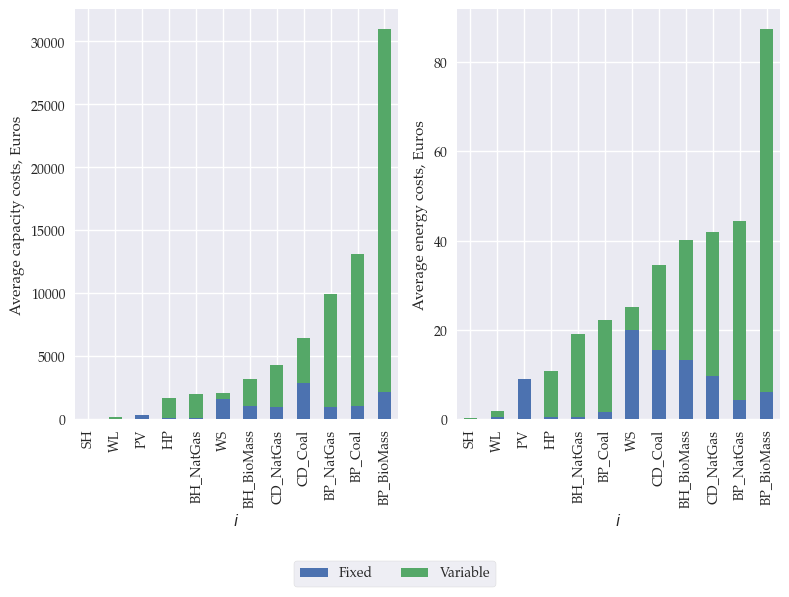

In [7]:
# Theoretical capacity:
cap = pd.concat([m.db['GeneratingCap_H'],m.db['GeneratingCap_E']])

# Generation
gen = pd.concat([
    adj.rc_pd(m.db['Generation_E'].add(m.db['Generation_H'],fill_value=0).droplevel('g'), ('not', pd.Index(['g1_HP'],name='id'))),
    adj.rc_pd(m.db['Generation_H'].droplevel('g'), pd.Index(['g1_HP'],name='id'))
])
# Total Fixed costs 
fcosts = 1000*adj.rc_pd(m.db['FOM'],db['id']) * cap * len(m.db['h'])/8760

# Total variable costs
vcosts = m.db['mc'].mul(gen.groupby('id').sum(),fill_value=0)
hp_elecCosts = adj.rc_pd(-m.db['Generation_E'],pd.Index(['g1_HP'],name='id')).mul( m.db['marginalSystemCosts_E']).groupby('id').sum()
vcosts = vcosts.add(hp_elecCosts,fill_value=0)

# Defining measures
fcosts_ACC = fcosts / cap
vcosts_ACC = vcosts / cap
fcosts_AEC = fcosts / pdSum(gen,'h')
vcosts_AEC = vcosts / pdSum(gen,'h')

# Collecting if dataframe
df = pd.concat({('Variable','Average capacity costs'): vcosts_ACC,
                ('Fixed', 'Average capacity costs'): fcosts_ACC,
                ('Total', 'Average capacity costs'):vcosts_ACC+fcosts_ACC,
                ('Variable','Average energy costs'): vcosts_AEC,
                ('Fixed', 'Average energy costs'): fcosts_AEC,
                ('Total', 'Average energy costs'):vcosts_AEC+fcosts_AEC,
                ('', 'Marginal costs'): m.db['mc']}, names = ['type','variable']).unstack(['variable','type'])
df.index = df.index.map(lambda x: x.strip('g1_'))
df = df.stack().stack()

# Plotting:
fig, ax = plt.subplots(ncols=2)
df.xs('Average capacity costs',level='variable').unstack('type').sort_values('Total').drop(columns='Total').plot(ax=ax[0],kind='bar', stacked=True,legend=False,ylabel='Average capacity costs, Euros',xlabel=r'$i$')
df.xs('Average energy costs',level='variable').unstack('type').sort_values('Total').drop(columns='Total').plot(ax=ax[1],kind='bar', stacked=True,legend=False,ylabel='Average energy costs, Euros',xlabel=r'$i$')
fig.tight_layout();
fig.legend(['Fixed','Variable'],loc='lower center', bbox_to_anchor=(0.5, -0.09), ncol=2, frameon=True)

Finally, we illustrate the price variation:

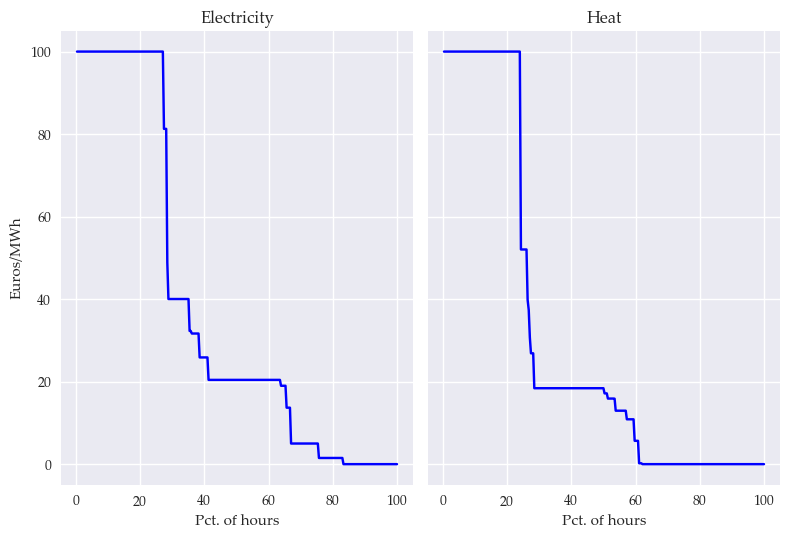

In [16]:
# Getting prices
p = pd.DataFrame({
    '$p_E$': pd.Series(m.db['marginalSystemCosts_E'].droplevel('g').sort_values(ascending=False).values,db['h']/len(db['h'])*100),
    '$p_H$': pd.Series(m.db['marginalSystemCosts_H'].droplevel('g').sort_values(ascending=False).values,db['h']/len(db['h'])*100)
})

# Plotting
fig, ax = plt.subplots(ncols=2,sharey=True)
p.plot(subplots=True,ax=ax,legend=False,color='blue',title=['Electricity','Heat'],ylabel='Euros/MWh',xlabel='Pct. of hours')
fig.tight_layout()

## E6

In this exercise you are asked to simulate the effects of increasing the heat pump capacity. We will do so by solving the model over of an exogenous grid of the heat pump capacity. For making the grid, the `pyDbs` package has a class called `adjMultiIndex`, which has a function called _addGrid_. It takes the four centrale arguments:

```python
adjMultiIndex.addGrid(v0,vT,index,name)
```
where 
- v0 is a Pandas Index specifying the first element of the grid. 
- vT is a Pandas Index specifying the last element of the grid.
- index is a Pandas Index specifying the number points in the gridd.
- name is the name of the variable, we are changing. 

The following makes the grid:

In [17]:
loop = pd.Index(range(11), name = 'l1')
v0 = pd.Series(0.01, index = pd.Index(['g1_HP'], name = 'id'), name = 'GeneratingCap_H')
vT = v0+100
grid = adjMultiIndex.addGrid(v0,vT,index=loop,name='GeneratingCap_H')

__Now use the 'loopSolveExtract'-function in the `modelShell`-class to solve the model of the exogenous grid. Furthermore, extract the following list of variables:
```python
extract = ['marginalSystemCosts_E','marginalSystemCosts_H', # hourly equilibrium prices
           'meanConsumerPrice_E','meanConsumerPrice_H', # average yearly consumer prices
           'Generation_E','Generation_H', # hourly generation
           'marginalEconomicValue','Emissions','FuelConsumption']
```

In [18]:
extract = ['marginalSystemCosts_E','marginalSystemCosts_H', # hourly equilibrium prices
           'meanConsumerPrice_E','meanConsumerPrice_H', # average yearly consumer prices
           'Generation_E','Generation_H', # hourly generation
           'marginalEconomicValue','Emissions','FuelConsumption','GeneratingCap_H']
solution = m.loopSolveExtract(loop, [grid], extract)

In [19]:
# grid = grid-0.01 # use this grid to plot things at clean integer levels

In [20]:
fuel = solution['FuelConsumption'].droplevel('g').unstack('BFt')
fuel = 100 * fuel/fuel.loc[0] # index fuel consumption
fuel.index = pd.Index(grid.values, name = 'Heat pump capacity')
emissions = solution['Emissions'].droplevel(['g','EmissionType'])
emissions.index = pd.Index(grid.values, name = 'Heat pump capacity')
# pcf = rc_pd(solution['PCF'], ids).unstack('id')
# pcf.index = pd.Index(grid.values, name = 'Heat pump capacity')

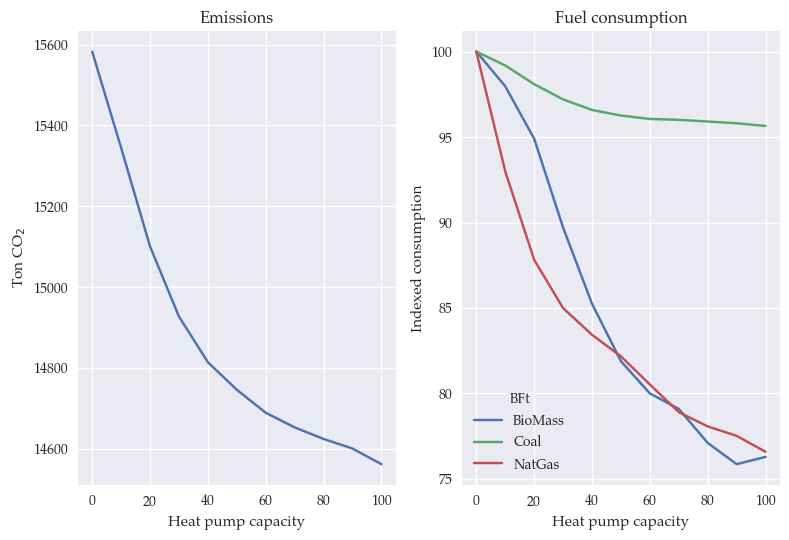

In [21]:
# %%capture
# mult_graphs()
fig, ax = plt.subplots(ncols=2);
emissions.plot(ax=ax[0],title='Emissions',ylabel='Ton CO$_2$')
fuel.plot(ax=ax[1],title='Fuel consumption',ylabel='Indexed consumption')
fig.tight_layout();
fig.savefig(f"{figs_path}\\exp_EmissionsFuels.pdf", edgecolor='k',bbox_inches='tight')

## E5

__Briefly explain the effect of increasing the heat pump capacity on emissions as illustrated in figure ##__

___Answer:___

Figure \ref{fig:Q1_HP_emissions} shows how emissions and fuel consumption depend on the installed heat pump capacity. Some relevant points to make here are:
- With installed capacity $<80$, emissions are decreasing in heat pump capacity (refer to this as 'low' levels capacity). When capacity $>80$, emissions are slightly increasing in heat pump capacity (refer to this as 'high' levels of capacity).
- Figure \ref{fig:Q1_HP_PCF} confirms that for low levels of installed capacity, the pump enables a much higher utilization of wind power (see capacity factors in top panel of \ref{fig:Q1_HP_PCF}). This is in line with our understanding of heat pumps as \textit{flexible demand} technologies: They primarily operate when electricity prices are low.
- For high levels of heat pump capacity, the wind turbines are (almost) fully utilized -- hence the flattened line of emissions.
- The reason why emissions slightly increase in the 'high' region is tricky and should very much be considered a "bonus point": 
    - Figure \ref{fig:Q1_HP_emissions} shows that consumption of natural gas slightly increases for for high levels of heat pump capacity.
    - Figure \ref{fig:Q1_HP_PCF} confirms that this is because the electricity producing plants \m{CD\_NatGas}, \m{CD\_Coal}, and \m{WL} plants are used slightly more while heat producing plants \m{BH\_NatGas} and \m{BH\_BioMass} are used slightly less. This substitution increases emissions in total. 
    - The reason why this substitution is optimal is that the heat pump has a conversion efficiency of roughly 350\% (see $\nu_i$ in the data). Thus -- even though the cost of generating heat using \m{BH\_NatGas} is cheaper than the cost of generating electricity using \m{CD\_NatGas} -- it is ultimately cheaper to generate heat using a combination of \m{CD\_NatGas} and heat pumps than just \m{BH\_NatGas}.  


## E6

__Figure ## show the _marginal economics value of generating capacity_ as a function of installed heat pump capacity. Explain the effect of the heat pump capacity on the marginal economic value of generating capacity for (i) electricity producing plants, (ii) heat generating plants, and (iii) back-pressure plants.__

___Asnwer:___

The marginal economic value is defined by differentiating the Lagrangian function from [E2](##E2) with respect to the relevant capacity variable. For the simple, electricity producing plants, for instance, this is defined by:
\begin{align*}
    \forall i\in\mathcal{I}^E: && \dfrac{\partial \mathcal{L}}{\partial q_i} &= -\text{FOM}_i +\sum_h \overline{\theta}_{i,h}^E \gamma_{i,h} \\ 
    && &=-\text{FOM}_i+\sum_h\mathbb{1}_{q_{i,h}}\left(\lambda_h^E-c_i\right)\cdot \gamma_{i,h}, \qquad \mathbb{1}_{q_{i,h}} = \left\lbrace \begin{array}{ll}1, & E_{i,h} = q_{i,h} \\ 0, & \text{else.}\end{array}\right.
\end{align*}
Thus, the marginal economic value depends on (i) costs, (ii) system costs/prices ($\lambda_h^E$), and (iii) correlation between system costs/prices and generation capacity (between $\lambda_h^E$, $\gamma_{i,h}$). 


_NB: As the question does not explicitly ask for it, students do not need to derive the expressions for the marginal economic value._


More specifically, for the three categories of plants:

- <u>Electricity producing plants</u> generally benefit from heat pump capacity (top panel figure \ref{fig:Q1_HP_MEV}). This is because heat pumps generally increase demand for electricity and thus drive up prices. We expect the highest impact for intermittent renewable plants that primarily operate when prices are low (wind plants in this example).
- <u>Heat producing plants</u> compete with heat pumps and thus lose value when heat pump capacity increases. 
- <u>Back pressure plants</u> engage in both markets and can thus -- in principle -- both increase and decrease in value when heat pump capacity increase. 
    
    On the heat market, a larger heat pump capacity lowers heat prices and crowds out back pressure plants. All else equal, this lowers the marginal economic value of back pressure plants. On the electricity market, however, a larger heat pump capacity drives up electricity demand and therefore also prices. All else equal, this increases the marginal economic value of back pressure plants. On total, the negative effect is dominating. 
    
    Here are a couple of relevant remarks that students may focus on to explain what happens:
    - In this system, the heat pumps drive down heat prices much faster than it drives up electricity prices (cf figure \ref{fig:Q1_HP_averagePrices}). This is because:
        - Electricity and heat production is *more elastic* at low prices. As heat pumps primarily operate when electricity prices are low and heat prices are high, we expect electricity prices to increase less (in absolute terms) compared to hours where heat prices decrease. To see this, consider figure `fig:Q1_HP_sortedPrices`: When the heat pump is active, electricity prices primarily increase from 0 to roughly 15 €/MWh. Conversely, heat prices drop from 100 €/MWh to 25-30 €/MWh.
        - Heat pump conversion efficiency is way above 100\% ($\approx$ 350\%). Thus, for every MWh of electricity it "consumes", it produces almost 3.5 MWh heat. The solar heating plant is the least affected by the change as it operates with very low marginal costs and thus never reduce production.
    - The three back pressure plants are not affected equally by the heat pump capacity (compare the slopes in figure \ref{fig:Q1_HP_MEV}). The reason for this is (at least in part) to be found in the technical *electricity-to-heat* ratios ($\nu_i$) provided in the data: A high $\nu_i$ indicates that the back-pressure plant $i$ primarily produces electricity and, secondarily, heat. As the heat pump leads to increased electricity prices and much lower heat prices, the back-pressure plants are better off the higher the $\nu_i$. This explanation is consistent with the `BP_BioMass` plant loosing value the fastest ($\nu_i=$0.49), then `BP_Coal` ($\nu_i=$0.84), and then `BP_NatGas`.